In [203]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf

In [136]:
df = yf.download('BTC-USD', start='2022-01-01', end='2022-12-31', interval='1h')
TS = df.drop(['High', 'Open', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
TS = TS.sort_index()
TS=TS.reset_index()

[*********************100%%**********************]  1 of 1 completed


In [155]:
# remove timezone from Datetime column and set_index
#TS['Datetime'] = TS['Datetime'].dt.tz_convert(None)
TS.set_index('Datetime', inplace=True)

In [195]:
TS.head()

,Adj Close
Datetime,
2022-01-01 00:00:00,46726.558594
2022-01-01 01:00:00,46788.546875
2022-01-01 02:00:00,46830.488281
2022-01-01 03:00:00,46833.105469
2022-01-01 04:00:00,46778.796875
...,...
2022-12-30 19:00:00,16542.847656
2022-12-30 20:00:00,16558.472656
2022-12-30 21:00:00,16593.435547


Text(0, 0.5, 'BTC Price')

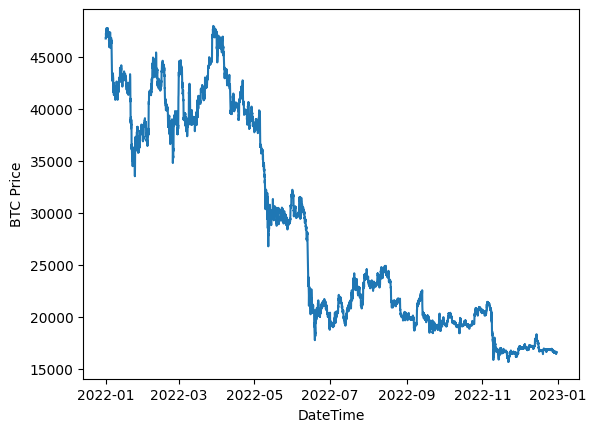

In [190]:
# Question 1
plt.plot(TS)
plt.xlabel('DateTime')
plt.ylabel('BTC Price')

In [196]:
Time = TS.index
Time

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               ...
               '2022-12-30 14:00:00', '2022-12-30 15:00:00',
               '2022-12-30 16:00:00', '2022-12-30 17:00:00',
               '2022-12-30 18:00:00', '2022-12-30 19:00:00',
               '2022-12-30 20:00:00', '2022-12-30 21:00:00',
               '2022-12-30 22:00:00', '2022-12-30 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=8723, freq=None)

In [197]:
# Question 2:
def MA(arr:np.ndarray, len:int):
   
    arr_revised = np.size(arr) - len + 1
    basic_arr = np.zeros(arr_revised)
    for i in range(arr_revised):
        basic_arr[i] = np.mean(arr[i:i + len])
    return basic_arr

In [198]:
MA_on_BTC_price = MA(TS, 50)
MA_on_BTC_price.size

8674

Text(0, 0.5, 'BTC Price')

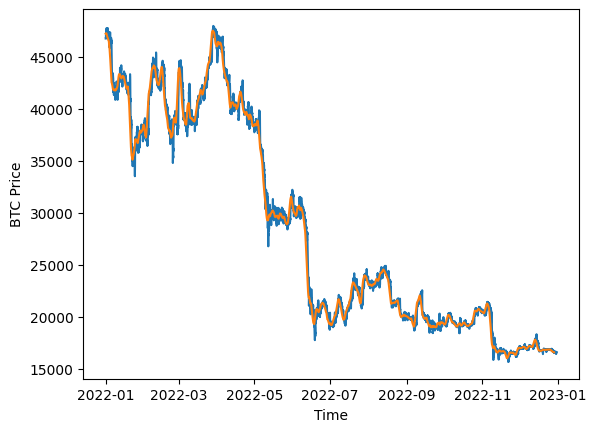

In [160]:
plt.plot(Time, BTC_price)
plt.plot(Time[:MA_on_BTC_price.size], MA_on_BTC_price)
plt.xlabel('Time')
plt.ylabel('BTC Price')

Text(0.5, 0, 'Datetime')

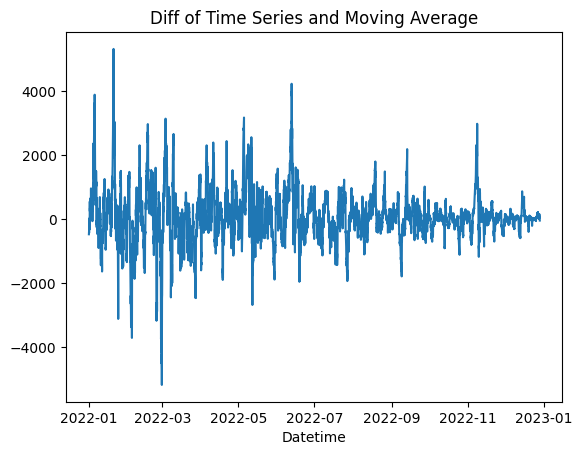

In [232]:
diff = BTC_price[:MA_on_BTC_price.size] - MA_on_BTC_price
plt.plot(Time[:diff.size], diff)
plt.title('Diff of Time Series and Moving Average')
plt.xlabel('Datetime')

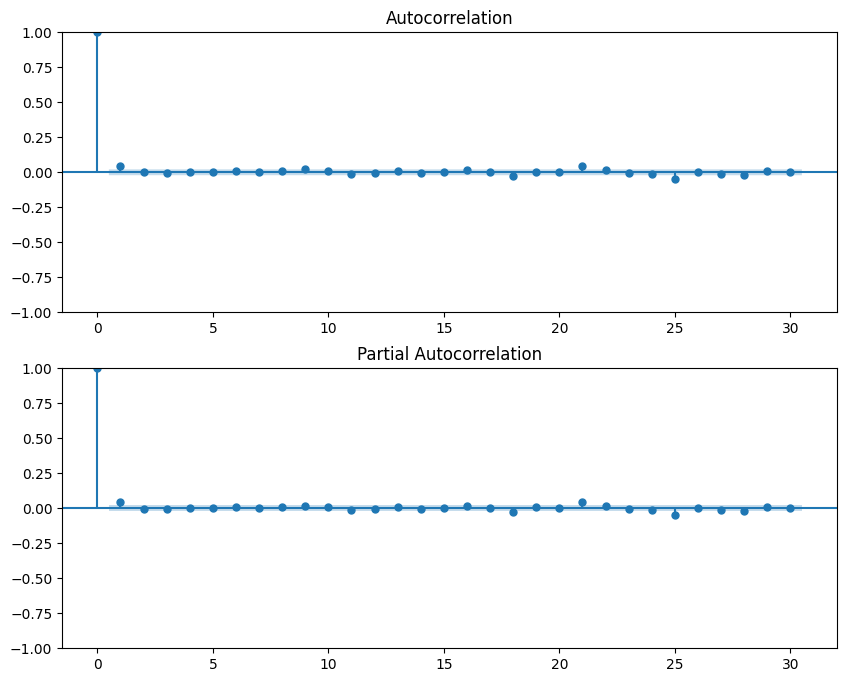

In [235]:
 
diff_by_shift = TS['Adj Close'].diff()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
sm.graphics.tsa.plot_acf(diff_by_shift.dropna(), lags=30, ax=ax1)
sm.graphics.tsa.plot_pacf(diff_by_shift.dropna(), lags=30, ax=ax2)
plt.show()

In [233]:
# Question 3:
#find parameters of p, q and d
# q: According to ACF plot, one lag is out of range. then q is 1.
# p:  According to PACF plot, one lag is out of range. then p is 1.
# d: value of d is optimal up to 2.
model = ARIMA(TS, order=(1,1,1))
model_fitted = model.fit()
print(model_fit.summary())

C:\Users\Radin\Desktop\ML-Basic\ML_Basic_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Radin\Desktop\ML-Basic\ML_Basic_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Radin\Desktop\ML-Basic\ML_Basic_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 8723
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -58276.075
Date:                Sun, 08 Oct 2023   AIC                         116556.149
Time:                        23:52:27   BIC                         116570.296
Sample:                             0   HQIC                        116560.971
                               - 8723                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0436      0.005      8.374      0.000       0.033       0.054
sigma2      3.724e+04    189.236    196.812      0.000    3.69e+04    3.76e+04
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [301]:
# Question 5: 
TS_predict = pd.Series(model_fitted.predict(start = 8724, end = 8726))
TS_true = TS[8720:].reset_index()

C:\Users\Radin\Desktop\ML-Basic\ML_Basic_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Radin\Desktop\ML-Basic\ML_Basic_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [323]:
# Question 4:
forcasting = model_fitted.predict(start = 8724, end = 8726)
print('Forecast the Bitcoin price for the next 3 hours:\n', forcasting)
#print(model_fit.forecast(steps=3))

Forecast the Bitcoin price for the next 3 hours:
 8724    16602.405546
8725    16602.405766
8726    16602.405762
Name: predicted_mean, dtype: float64


C:\Users\Radin\Desktop\ML-Basic\ML_Basic_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [386]:
# Question 5:
#TS_true.drop('Datetime', axis=1, inplace=True)
#TS_true
MAE = np.mean(np.abs(np.array(TS_predict)-np.array(TS_true.T)))
RMSE = np.mean((np.array(TS_predict)-np.array(TS_true.T))**2)**0.5
print('MAE:', MAE,'\nRMSE:', RMSE)

MAE: 7.737722722560041 
RMSE: 9.442637251197263


In [392]:
# Calculate of error indexes in each element 
def find_err(my_TS, num):
    for i in range(1, num+1):
     true_val = my_TS.iloc[len(my_TS)+i-num:, 0]
     predict_val = model_fitted.predict(len(my_TS)+i)  
     MAE = np.mean(np.abs(np.array(TS_predict)-np.array(TS_true)))   
     RMSE = np.mean((np.array(TS_predict)-np.array(TS_true))**2)**0.5  
     print(predict_val, MAE, RMSE)

    return predict_val, MAE, RMSE

In [400]:
results = find_err(TS, 3)
results

8724    16602.405546
dtype: float64 7.737722722560041 9.442645778684806
8725    16602.405766
dtype: float64 7.737722722560041 9.442645778684806
8726    16602.405762
dtype: float64 7.737722722560041 9.442645778684806


C:\Users\Radin\Desktop\ML-Basic\ML_Basic_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Radin\Desktop\ML-Basic\ML_Basic_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Radin\Desktop\ML-Basic\ML_Basic_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


8726    16602.405762
dtype: float64